In [20]:
!pip install kaggle

In [21]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [23]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:13<00:00, 173MB/s]
100% 812M/812M [00:13<00:00, 64.8MB/s]


In [24]:
!ls


dogs-vs-cats.zip  kaggle.json  sample_data


In [25]:
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [26]:
from zipfile import ZipFile

dataset='/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [27]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [28]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.822.jpg', 'cat.2883.jpg', 'dog.7557.jpg', 'cat.10116.jpg', 'dog.9914.jpg', 'cat.11094.jpg', 'cat.9486.jpg', 'cat.11386.jpg', 'cat.11296.jpg', 'dog.10637.jpg', 'cat.10475.jpg', 'cat.3442.jpg', 'cat.5508.jpg', 'cat.11149.jpg', 'dog.10112.jpg', 'dog.10866.jpg', 'cat.11231.jpg', 'cat.2121.jpg', 'dog.8113.jpg', 'dog.12014.jpg', 'cat.7584.jpg', 'dog.2201.jpg', 'dog.4083.jpg', 'dog.2729.jpg', 'cat.67.jpg', 'cat.9758.jpg', 'dog.10217.jpg', 'dog.11096.jpg', 'dog.5723.jpg', 'dog.1761.jpg', 'dog.532.jpg', 'dog.7927.jpg', 'dog.5342.jpg', 'dog.10844.jpg', 'dog.1240.jpg', 'dog.799.jpg', 'cat.8696.jpg', 'dog.7591.jpg', 'cat.9521.jpg', 'dog.8652.jpg', 'dog.11061.jpg', 'cat.9690.jpg', 'cat.4212.jpg', 'dog.5158.jpg', 'dog.7140.jpg', 'cat.4358.jpg', 'cat.8826.jpg', 'dog.742.jpg', 'cat.170.jpg', 'dog.2725.jpg', 'dog.10369.jpg', 'cat.10648.jpg', 'cat.9011.jpg', 'dog.4731.jpg', 'dog.7902.jpg', 'dog.2143.jpg', 'cat.2915.jpg', 'cat.9140.jpg', 'cat.4069.jpg', 'dog.4238.jpg', 'cat.5837.jpg', 'dog.5592.jpg

In [29]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

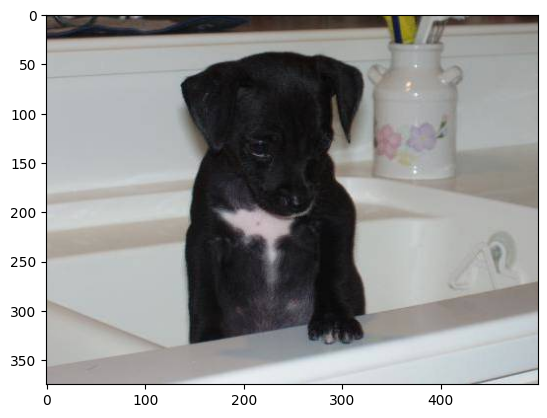

In [30]:
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

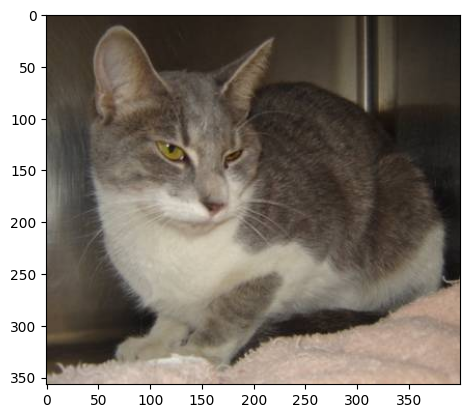

In [31]:
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [32]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])


dog
cat
dog
cat
dog


In [33]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [34]:
os.mkdir('/content/image resized')

In [35]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

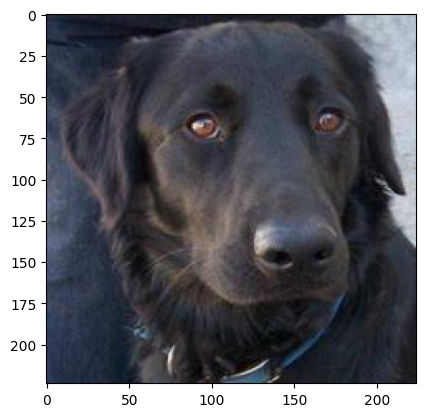

In [38]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.10078.jpg')
imgplt = plt.imshow(img)
plt.show()

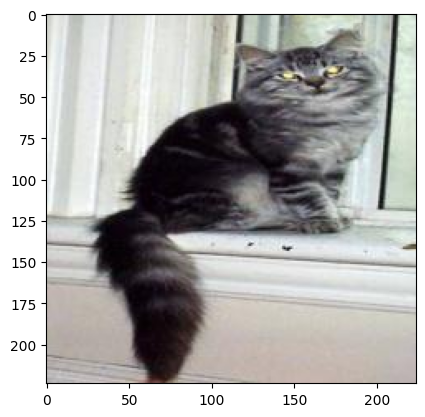

In [39]:
img = mpimg.imread('/content/image resized/cat.9914.jpg')
imgplt = plt.imshow(img)
plt.show()

In [40]:
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [41]:
print(filenames[0:5])
print(len(filenames))

['dog.822.jpg', 'cat.2883.jpg', 'dog.7557.jpg', 'cat.10116.jpg', 'dog.9914.jpg']
2000


In [42]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 1]
2000


In [43]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 991 1009]


In [44]:
import cv2
import glob

In [45]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [46]:
print(dog_cat_images)

[[[[122 158 194]
   [ 55  91 127]
   [100 138 173]
   ...
   [198 219 240]
   [205 225 243]
   [220 240 255]]

  [[132 168 204]
   [ 94 130 166]
   [118 156 191]
   ...
   [200 221 242]
   [195 215 233]
   [195 215 233]]

  [[136 172 208]
   [105 141 177]
   [103 141 176]
   ...
   [189 210 231]
   [198 218 236]
   [210 230 248]]

  ...

  [[212 233 255]
   [206 230 250]
   [189 210 231]
   ...
   [ 43  78 111]
   [ 46  79 112]
   [ 89 124 157]]

  [[202 221 242]
   [187 209 227]
   [187 207 225]
   ...
   [ 32  67  93]
   [ 32  65  91]
   [ 72 107 133]]

  [[220 240 255]
   [199 219 237]
   [211 231 249]
   ...
   [116 150 174]
   [111 145 169]
   [152 186 210]]]


 [[[ 11   3   4]
   [ 18  12  13]
   [ 13   8   7]
   ...
   [  5   5   5]
   [ 11  11  11]
   [  3   3   3]]

  [[  7   0   0]
   [ 10   4   5]
   [ 12   7   8]
   ...
   [  7   7   7]
   [  5   5   5]
   [  1   1   1]]

  [[ 16   9  12]
   [ 10   4   5]
   [  7   2   3]
   ...
   [  4   4   4]
   [  7   7   7]
   [ 13  13

In [47]:
type(dog_cat_images)

numpy.ndarray

In [48]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [49]:
X = dog_cat_images
Y = np.asarray(labels)


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [51]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [52]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [53]:
print(X_train_scaled)

[[[[0.28235294 0.31372549 0.38039216]
   [0.21960784 0.25098039 0.31764706]
   [0.16078431 0.18823529 0.26666667]
   ...
   [0.39215686 0.41960784 0.96470588]
   [0.41176471 0.44313725 0.98039216]
   [0.43921569 0.47058824 1.        ]]

  [[0.23921569 0.27058824 0.3372549 ]
   [0.18039216 0.20784314 0.28235294]
   [0.13333333 0.16078431 0.23921569]
   ...
   [0.38823529 0.41960784 0.95686275]
   [0.41568627 0.44705882 0.98431373]
   [0.45098039 0.48627451 1.        ]]

  [[0.17647059 0.20392157 0.27843137]
   [0.1372549  0.16470588 0.23921569]
   [0.11372549 0.14117647 0.21960784]
   ...
   [0.38823529 0.42352941 0.94901961]
   [0.42352941 0.45882353 0.98431373]
   [0.4627451  0.49803922 1.        ]]

  ...

  [[0.49411765 0.74509804 1.        ]
   [0.49019608 0.74117647 0.99607843]
   [0.48235294 0.73333333 0.98823529]
   ...
   [0.48235294 0.81568627 0.96470588]
   [0.4745098  0.80784314 0.96470588]
   [0.47843137 0.8        0.96078431]]

  [[0.48627451 0.7372549  0.99215686]
   [0.4

In [54]:
import tensorflow as tf
import tensorflow_hub as hub

In [55]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [56]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [57]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [58]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 69s 1s/step - loss: 0.2008 - acc: 0.9225
Epoch 2/5
50/50 [==============================] - 63s 1s/step - loss: 0.0572 - acc: 0.9800
Epoch 3/5
50/50 [==============================] - 62s 1s/step - loss: 0.0412 - acc: 0.9875
Epoch 4/5
50/50 [==============================] - 73s 1s/step - loss: 0.0305 - acc: 0.9937
Epoch 5/5
50/50 [==============================] - 66s 1s/step - loss: 0.0252 - acc: 0.9956


In [59]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0657 - acc: 0.9825
Test Loss = 0.06568671017885208
Test Accuracy = 0.9825000166893005


In [72]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to handle file upload
def handle_file_upload(uploaded_file):
    nparr = np.frombuffer(uploaded_file, np.uint8)
    input_image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    cv2_imshow(input_image)

    input_image_resize = cv2.resize(input_image, (224,224))
    input_image_scaled = input_image_resize / 255
    image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    if input_pred_label == 0:
        print('The image represents a Cat')
    elif input_pred_label == 1:
        print('The image represents a Dog')
    else:
        print('It is neither a Cat nor a Dog')

# Function to handle image path input
def handle_image_path(input_image_path):
    input_image = cv2.imread(input_image_path)
    cv2_imshow(input_image)

    input_image_resize = cv2.resize(input_image, (224,224))
    input_image_scaled = input_image_resize / 255
    image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

    input_prediction = model.predict(image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    if input_pred_label == 0:
        print('The image represents a Cat')
    elif input_pred_label == 1:
        print('The image represents a Dog')
    else:
        print('It is neither a Cat nor a Dog')

# Choose method to input image
method = input("Choose method to input image (1 for file upload, 2 for image path): ")

if method == '1':
    from google.colab import files
    print("Upload an image:")
    uploaded = files.upload()
    for filename, content in uploaded.items():
        handle_file_upload(content)
elif method == '2':
    input_image_path = input('Enter the path of the image to be predicted: ')
    handle_image_path(input_image_path)
else:
    print("Invalid input method. Please choose 1 for file upload or 2 for image path.")


Output hidden; open in https://colab.research.google.com to view.